In [36]:
import sys
sys.path.append('../')

from g_ml.utilidades.metricas import MSE
from g_ml.utilidades.metricas import MRE

from g_ml.utilidades.processamento import treino_teste
from g_ml.utilidades.processamento import escala_padrao
from g_ml.utilidades.processamento import escala_min_max

from g_ml.algoritmos.regressao import OLS
from g_ml.algoritmos.regressao import RegressaoGD
from g_ml.algoritmos.regressao import SGD
from g_ml.algoritmos.regressao import RegressaoPolinomial


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# Aplicação da Regressão linear analítica (OLS)

In [2]:
# Dados artificiais em uma dimensão
df = pd.read_csv('../data/artificial1d.csv', names = ['x','y'])
X = df['x'].to_numpy().reshape(-1,1)
y = df['y'].to_numpy().reshape(-1,1)

In [3]:
ols = OLS()

In [4]:
ols.fit(X, y)

In [5]:
ols.w

array([[0.06761792],
       [1.57486517]])

In [6]:
y_pred = ols.predict(X)

In [7]:
mse = MSE(y, y_pred)
mre = MRE(y, y_pred)
rmse = np.sqrt(mse)

print("A raiz do erro quadrático médio é: {}".format(rmse))
print("O erro relativo médio absoluto é: {}".format(mre))


A raiz do erro quadrático médio é: 0.461953354062258
O erro relativo médio absoluto é: 0.5865122801771744


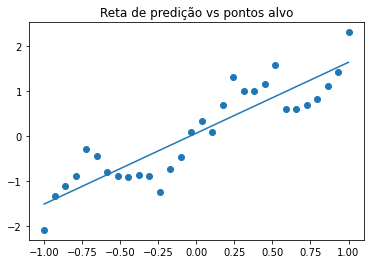

In [8]:
X_plot = np.linspace(X.max(), X.min(), 1000)
y_plot = ols.predict(X_plot)

plt.scatter(X, y)
plt.plot(X_plot, y_plot)
plt.title("Reta de predição vs pontos alvo")
plt.show()

Claramente precisamos de um modelo não linear

# Algoritmo Gradiente Descendente (GD)

In [9]:
df = pd.read_csv('../data/artificial1d.csv', names = ['x','y'])
X = df['x'].to_numpy().reshape(-1,1)
y = df['y'].to_numpy()

In [10]:
gd = RegressaoGD()

In [11]:
gd.fit(X,y)

In [12]:
gd.w

array([0.06763117, 1.55728432])

In [13]:
y_pred = gd.predict(X)

In [14]:
mse = MSE(y, y_pred)
mre = MRE(y, y_pred)
rmse = np.sqrt(mse)

print("A raiz do erro quadrático médio é: {}".format(mse))
print("O erro relativo médio absoluto é: {}".format(mre))

A raiz do erro quadrático médio é: 0.21351103571902666
O erro relativo médio absoluto é: 0.5814087448129349


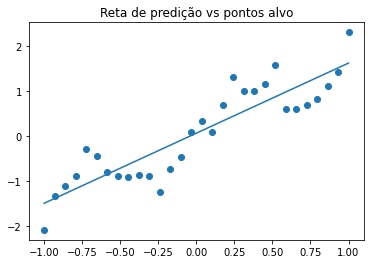

In [15]:
X_plot = np.linspace(X.max(), X.min(), 1000)
y_plot = gd.predict(X_plot)

plt.scatter(X, y)
plt.plot(X_plot, y_plot)
plt.title("Reta de predição vs pontos alvo")
plt.show()

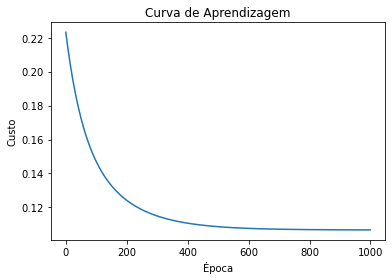

In [16]:
plt.plot(gd.custos)
plt.xlabel('Época')
plt.ylabel('Custo')
plt.title('Curva de Aprendizagem')
plt.show()

# Algoritmo Gradiente Descendente Estocástico (SGD/LMS)

In [17]:
df = pd.read_csv('../data/artificial1d.csv', names = ['x','y'])
X = df['x'].to_numpy().reshape(-1,1)
y = df['y'].to_numpy()

In [18]:
sgd = SGD()
sgd.fit(X,y)
sgd.w

array([0.06897937, 1.57545885])

In [19]:
y_pred = sgd.predict(X)

In [20]:
mse = MSE(y, y_pred)
mre = MRE(y, y_pred)
rmse = np.sqrt(mse)

print("A raiz do erro quadrático médio é: {}".format(mse))
print("O erro relativo médio absoluto é: {}".format(mre))

A raiz do erro quadrático médio é: 0.21340288045422706
O erro relativo médio absoluto é: 0.586605688009825


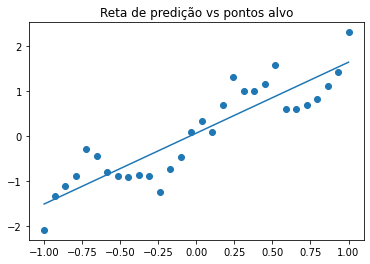

In [21]:
X_plot = np.linspace(X.max(), X.min(), 1000)
y_plot = sgd.predict(X_plot)

plt.scatter(X, y)
plt.plot(X_plot, y_plot)
plt.title("Reta de predição vs pontos alvo")
plt.show()

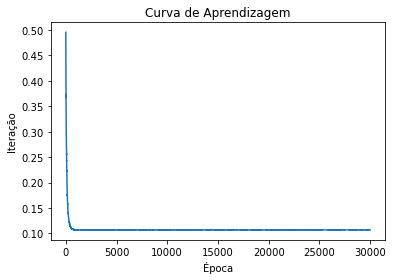

In [22]:
plt.plot(sgd.custos)
plt.xlabel('Época')
plt.ylabel('Iteração')
plt.title('Curva de Aprendizagem')
plt.show()

# Regressão Polinomial

In [52]:
from sklearn.datasets import load_boston
X, y = load_boston(return_X_y=True)


In [53]:
X_treino, X_teste, y_treino, y_teste = treino_teste(X, y, tamanho_teste = 0.2)

In [54]:
escalador_X_01 = escala_min_max()
escalador_y_01 = escala_min_max()

escalador_X_01.fit(X_treino)
escalador_y_01.fit(y_treino)

X_treino_01 = escalador_X_01.transform(X_treino)
X_teste_01 = escalador_X_01.transform(X_teste)
y_treino_01 = escalador_y_01.transform(y_treino)
y_teste_01 = escalador_y_01.transform(y_teste)

In [65]:
# Testando regressão normal
model = RegressaoGD()
model.fit(X_treino_01,y_treino_01)
y_pred = model.predict(X_teste_01)
y_pred = escalador_y.inversa(y_pred)
mse = MSE(y_teste, y_pred)
mre = MRE(y_teste, y_pred)
rmse = np.sqrt(mse)

0.474654666950233

In [66]:
model.w

array([ 0.18712798,  0.22874625,  0.65859766,  0.46793529,  0.57337859,
        0.83739146,  0.40120289,  0.65843783,  0.42264306,  0.32420189,
        0.15484681,  0.16600052, -0.02299435,  0.73913679])

In [91]:
mre_teste = []
rmse_teste = []

mre_treino = []
rmse_treino= []

for i in range(1,12):
    
    polinomial = RegressaoPolinomial(ordem=i)
    polinomial.fit(X_treino_01,y_treino_01)
    y_pred = polinomial.predict(X_teste_01)
    y_pred = escalador_y_01.inversa(y_pred)
    
    y_pred_treino = polinomial.predict(X_treino_01)
    y_pred_treino = escalador_y_01.inversa(y_pred_treino)
    
    mre_teste.append(MRE(y_teste, y_pred))
    rmse_teste.append(np.sqrt(MSE(y_teste, y_pred)))
    
    mre_treino.append(MRE(y_treino, y_pred_treino))
    rmse_treino.append(np.sqrt(MSE(y_treino, y_pred_treino)))
    
    


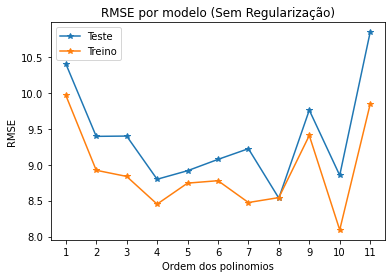

In [124]:
ticks = np.arange(0,11)
label = np.arange(1,12)
plt.plot(rmse_teste,label='Teste',marker='*')
plt.plot(rmse_treino,label='Treino',marker='*')
plt.xticks(ticks, labels=label )
plt.xlabel("Ordem dos polinomios")
plt.ylabel("RMSE")
plt.title("RMSE por modelo (Sem Regularização)")
plt.legend()
plt.show()

In [92]:
mre_teste

[0.38043926207278517,
 0.34371836182492793,
 0.34852596677900705,
 0.32179109196099476,
 0.3142882267508568,
 0.32998166802557616,
 0.34731233913903864,
 0.2962379232033884,
 0.3865497964295835,
 0.31421832418199697,
 0.4498387677864934]

In [93]:
rmse_teste

[10.407484415255523,
 9.395310237248955,
 9.399363401356789,
 8.797768140424965,
 8.916512386263557,
 9.07445935021086,
 9.223272292331599,
 8.534481729658635,
 9.760912768075992,
 8.852213040593604,
 10.845815822412192]

In [94]:
mre_treino

[0.40259290655513813,
 0.3486284099961436,
 0.3489008894021286,
 0.31827729040832814,
 0.3231462862707268,
 0.33400984878955575,
 0.32790384162322955,
 0.3140328950652876,
 0.3950960325432497,
 0.29710872969632723,
 0.4214939922441229]

In [95]:
rmse_treino

[9.967913892720306,
 8.922892338285356,
 8.837049615470344,
 8.45121728292999,
 8.743720881753665,
 8.777644172503852,
 8.473704611642246,
 8.542123751973374,
 9.40761342954198,
 8.091921011564981,
 9.843141749728733]

# PROTOTIPANDO A CLASSE
class RP():
    def __init__(self, t=1000, taxa = 0.01, lamb = 0, ordem = 1):
        self.w = None
        self.t = t
        self.taxa = taxa
        self.w_passados = []
        self.custos = []
        self.lamb = lamb
        self.ordem = ordem
        
    def fit(self, X, y):
        
        if self.ordem == 1:
            X = np.c_[np.ones(X.shape[0]), X]
            
        if self.ordem > 1:
            for coluna in range(X.shape[1]):
                for i in range(2, self.ordem+1):
                    X = np.c_[X, X[:, coluna]**i]
                    
            X = np.c_[np.ones(X.shape[0]), X]            
        self.w = np.random.rand(X.shape[1])
        
        for epoca in range(self.t):
            pred = X @ self.w
            erro = y - pred
            
            
            #custo = (1/(2*len(y))) * np.sum((y - pred)**2)
            
            
            
            self.w = self.w + (self.taxa * (1/len(y)) * (X.T @ erro))
            #self.custos.append(custo)
            self.w_passados.append(self.w)
            
            
            
            
        
        
        
        

In [31]:
X.shape

(506, 13)

In [69]:
rp = RP(ordem=11)
rp.fit(X_treino_01, y_treino_01)
rp.w

array([ 7.70490236e-03,  8.39050302e-01,  7.29726418e-01,  5.74036330e-01,
        2.77377738e-01,  9.09955013e-01,  4.38868010e-02,  4.91821634e-02,
        3.91650134e-01,  1.08309364e-01,  5.02523758e-01,  7.87307260e-01,
        1.47247793e-01,  5.67912917e-01,  9.81625671e-01,  8.84141403e-01,
        6.00792657e-01,  9.03723334e-01,  9.89184838e-01,  7.43352814e-01,
        6.49864085e-02,  4.01580236e-01,  8.37825735e-01,  2.30569196e-01,
        8.31957263e-01,  1.20485089e-01,  4.69629616e-02,  3.84092799e-01,
        3.67322134e-02,  9.57270298e-01,  8.26205700e-01,  8.00769688e-01,
        6.29777923e-01,  2.16324023e-01,  5.17829277e-01,  5.97262152e-01,
        5.25031164e-01,  2.60233358e-01,  5.15247924e-01,  4.91186341e-01,
        9.96335776e-01,  8.97436148e-01,  4.63380748e-01,  6.22937383e-01,
        7.47871762e-01,  3.48651605e-02,  8.94921441e-01,  8.60126816e-01,
        4.57432098e-01,  3.91169766e-01,  2.72959375e-01,  4.76676828e-01,
        4.43766635e-02,  

In [33]:
rp.w

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan])

In [34]:
pred = rp.predict(X_teste_escalado)

AttributeError: 'RP' object has no attribute 'predict'

In [44]:
ordem = 5

In [45]:
for coluna in range(X_treino_01.shape[1]):
    for i in range(2, ordem+1):
        X_treino_01 = np.c_[X_treino_01, X_treino_01[:, coluna]**i]

X_treino_01 = np.c_[np.ones(X_treino_01.shape[0]), X_treino_01]

w = np.random.rand(X_treino_01.shape[1])

In [46]:
X_treino_01.shape

(405, 66)

In [47]:
w.shape

(66,)

In [ ]:
y_treino_escalado.shape

In [48]:
(X_treino_01 @ w).shape

(405,)

In [50]:
for i in range(1000):
    #custo = (1/(2*len(y))) * np.sum((y - pred)**2)
    pred = X_treino_01 @ w 
    erro = y_treino_01 - pred
    w = w + (0.01 * (1/len(y)) * (X_treino_01.T @ erro))
    print(i), print(w)
    



0
[-0.19373004  0.53310445  0.67661437  0.60262226  0.94382985  0.94367024
  0.86121679  0.56226459  0.7977445   0.66417256  0.09855457  0.10991462
  0.47080559  0.80589753  0.62569413  0.82040851  0.65148297  0.20668416
  0.27336503  0.21453109  0.37725287  0.03896243  0.61794163  0.33654615
  0.65572242  0.38539661  0.68161358  0.34062457  0.26069453  0.49603745
  0.69288985  0.3483366   0.93664815  0.03918633  0.41789399  0.96758009
  0.54797188  0.42347094  0.55969793  0.57482306  0.73150665  0.12767137
  0.24999611  0.58054385  0.86711661  0.56186669  0.23822184  0.67983256
  0.73990835  0.23823614  0.00947926  0.22399427  0.2220103   0.14008241
  0.29713268  0.09997118  0.05348492  0.95854149  0.66615188  0.25735192
  0.90392568  0.64801236  0.48213306  0.49301376  0.083284    0.09170413]
1
[-0.19604767  0.53307562  0.67660217  0.602571    0.94382971  0.9436682
  0.8611977   0.56199524  0.79773506  0.66411965  0.09676564  0.10985024
  0.46966113  0.80583862  0.62569293  0.8204084

  0.89579069  0.64356311  0.48201766  0.49300986  0.08328386  0.09170413]
124
[-0.29240851  0.53103238  0.67744023  0.59967551  0.94383136  0.94357197
  0.86050725  0.5483976   0.79747026  0.66093829  0.00102805  0.1069051
  0.41993023  0.80228479  0.62560083  0.82040106  0.65148221  0.20668408
  0.27343836  0.2145392   0.37725385  0.03896256  0.61786313  0.33654403
  0.65572236  0.38539661  0.68161358  0.34062457  0.26069453  0.49603745
  0.69288976  0.3483366   0.93664815  0.03918633  0.41788921  0.96758007
  0.54797188  0.42347094  0.55784935  0.57457701  0.73147375  0.12766695
  0.24999519  0.58054384  0.86711661  0.56186669  0.23811257  0.67982886
  0.73990823  0.23823613 -0.08255956  0.13801846  0.14174286  0.06501719
  0.29704284  0.09996853  0.05348484  0.95854148  0.63867153  0.24241626
  0.89578008  0.64355707  0.48201712  0.49300984  0.08328386  0.09170413]
125
[-2.92443650e-01  5.31022359e-01  6.77455489e-01  5.99666043e-01
  9.43831446e-01  9.43571813e-01  8.60508179e-01  

  0.89571082  0.64347827  0.48196119  0.49300773  0.08328378  0.09170412]
253
[-0.27698653  0.53002456  0.67948855  0.59892672  0.94384512  0.94356976
  0.86079848  0.54669776  0.79770262  0.65996974 -0.0163698   0.10692841
  0.42227334  0.80098257  0.625547    0.82039644  0.65148171  0.20668402
  0.27361252  0.21455729  0.37725592  0.0389628   0.61783698  0.33654326
  0.65572233  0.38539661  0.6816136   0.34062457  0.26069453  0.49603745
  0.69288974  0.3483366   0.93664815  0.03918633  0.41789333  0.96758012
  0.54797188  0.42347094  0.5574499   0.57451186  0.731464    0.12766554
  0.24999735  0.58054386  0.86711661  0.56186669  0.23806993  0.67982734
  0.73990817  0.23823613 -0.11115817  0.10621409  0.10976975  0.03403428
  0.29703459  0.0999681   0.05348483  0.95854148  0.63914757  0.24245369
  0.89571326  0.64347923  0.48196082  0.49300772  0.08328378  0.09170412]
254
[-0.27680451  0.53001821  0.67950393  0.5989229   0.94384524  0.94356981
  0.86080126  0.54669339  0.79770452  0.6

  0.89581554  0.64348844  0.48191904  0.49300612  0.08328372  0.09170412]
371
[-0.25594879  0.52935862  0.68118244  0.59854453  0.94385851  0.94357621
  0.86111876  0.54634858  0.7979064   0.65951132 -0.02162809  0.10717276
  0.42615207  0.80006875  0.62550783  0.82039293  0.65148133  0.20668398
  0.27375764  0.21457244  0.37725766  0.03896301  0.61782184  0.3365428
  0.65572232  0.38539661  0.68161362  0.34062457  0.26069453  0.49603745
  0.69288974  0.3483366   0.93664815  0.03918633  0.41789751  0.96758017
  0.54797188  0.42347094  0.55725706  0.57447593  0.73145829  0.12766468
  0.24999907  0.58054388  0.86711661  0.56186669  0.23804649  0.67982649
  0.73990814  0.23823613 -0.12573172  0.08862484  0.09158077  0.01618839
  0.29703397  0.09996792  0.05348482  0.95854148  0.64031042  0.24282563
  0.89581443  0.64348741  0.4819187   0.4930061   0.08328372  0.09170412]
372
[-0.25578163  0.52935357  0.68119575  0.5985417   0.94385862  0.94357627
  0.86112136  0.54634613  0.79790793  0.65

475
[-0.23990713  0.52887339  0.68248329  0.59827012  0.94387011  0.94358152
  0.86137487  0.54607792  0.79804887  0.65924867 -0.02421137  0.10734676
  0.42742128  0.79930025  0.62547743  0.82039015  0.65148103  0.20668394
  0.27387014  0.21458428  0.37725903  0.03896318  0.61781101  0.33654246
  0.65572231  0.38539661  0.68161364  0.34062457  0.26069453  0.49603745
  0.69288974  0.3483366   0.93664815  0.03918633  0.41790093  0.96758021
  0.54797188  0.42347094  0.55711039  0.57444856  0.73145393  0.12766402
  0.25000021  0.58054389  0.86711661  0.56186669  0.23803194  0.67982595
  0.73990813  0.23823613 -0.1348784   0.07734082  0.07984     0.00464108
  0.2970329   0.09996776  0.05348481  0.95854148  0.64008479  0.24244934
  0.89551047  0.64327592  0.48188396  0.49300478  0.08328366  0.09170412]
476
[-0.23976577  0.52886907  0.68249504  0.59826765  0.94387022  0.94358157
  0.8613772   0.54607509  0.79805008  0.6592466  -0.02423092  0.10734819
  0.42742387  0.79929292  0.62547715  0.82

  0.894932    0.64291526  0.48185273  0.49300359  0.08328362  0.09170412]
573
[-0.22709341  0.52847618  0.68357667  0.59803931  0.94388084  0.94358571
  0.86159325  0.54577522  0.7981559   0.65908041 -0.02577308  0.10746597
  0.42692438  0.79858622  0.62545123  0.8203877   0.65148076  0.20668391
  0.27396551  0.21459439  0.37726021  0.03896332  0.61780214  0.33654219
  0.6557223   0.38539661  0.68161365  0.34062457  0.26069453  0.49603745
  0.69288974  0.3483366   0.93664815  0.03918633  0.41790392  0.96758025
  0.54797188  0.42347094  0.5569788   0.5744245   0.73145011  0.12766344
  0.25000103  0.58054389  0.86711661  0.56186669  0.23802185  0.67982557
  0.73990811  0.23823613 -0.14144924  0.06915158  0.07130235 -0.0037605
  0.29703108  0.0999676   0.0534848   0.95854148  0.6389063   0.24155569
  0.89492479  0.64291085  0.48185241  0.49300358  0.08328362  0.09170412]
574
[-0.22697273  0.52847237  0.68358727  0.59803706  0.94388095  0.94358575
  0.86159538  0.54577187  0.79815687  0.65

  0.89428668  0.64252471  0.48182759  0.49300264  0.08328358  0.09170412]
653
[-0.21799491  0.52818461  0.68439457  0.59786486  0.94388948  0.9435886
  0.86175804  0.5454931   0.79822775  0.65898585 -0.02661341  0.10753629
  0.42555497  0.79800729  0.62543118  0.82038579  0.65148054  0.20668389
  0.27403736  0.21460206  0.37726111  0.03896343  0.6177956   0.33654198
  0.65572229  0.38539661  0.68161367  0.34062457  0.26069453  0.49603745
  0.69288973  0.3483366   0.93664815  0.03918633  0.41790624  0.96758028
  0.54797188  0.42347094  0.55687406  0.5744057   0.73144714  0.127663
  0.25000156  0.5805439   0.86711661  0.56186669  0.23801559  0.67982533
  0.7399081   0.23823613 -0.14571019  0.06379723  0.06571367 -0.00926092
  0.2970291   0.09996745  0.0534848   0.95854148  0.63739727  0.24052158
  0.8942778   0.64251938  0.48182728  0.49300263  0.08328358  0.09170412]
654
[-0.21788784  0.52818112  0.68440443  0.59786274  0.94388959  0.94358864
  0.86176004  0.54548939  0.79822857  0.6589

  0.89328474  0.64192725  0.48179584  0.49300144  0.08328353  0.09170411]
756
[-0.20770548  0.52784241  0.68537074  0.59765401  0.9439005   0.94359177
  0.86195614  0.54509081  0.79830423  0.65890763 -0.02726599  0.10759849
  0.42281194  0.79726527  0.62540672  0.82038344  0.65148028  0.20668385
  0.27412367  0.21461132  0.37726219  0.03896356  0.61778789  0.33654174
  0.65572229  0.38539661  0.68161368  0.34062457  0.26069453  0.49603745
  0.69288973  0.3483366   0.93664815  0.03918633  0.41790907  0.96758032
  0.54797188  0.42347094  0.55674158  0.57438231  0.73144347  0.12766245
  0.25000208  0.5805439   0.86711661  0.56186669  0.23800955  0.6798251
  0.7399081   0.23823613 -0.15007498  0.05826163  0.05992963 -0.01495358
  0.297026    0.09996726  0.05348479  0.95854148  0.63490049  0.2388822
  0.89327423  0.64192101  0.48179554  0.49300143  0.08328353  0.09170411]
757
[-0.20761227  0.52783925  0.68537986  0.59765203  0.94390061  0.9435918
  0.861958    0.54508672  0.7983049   0.6589

  0.89211484  0.6412361   0.48176401  0.49300024  0.08328349  0.09170411]
861
[-0.19850539  0.52752297  0.68629706  0.59745101  0.94391162  0.94359449
  0.86214537  0.54464387  0.79836781  0.65886665 -0.02755579  0.10763622
  0.41915836  0.79651134  0.62538298  0.82038113  0.65148002  0.20668382
  0.27420613  0.21462021  0.37726324  0.03896369  0.61778067  0.33654151
  0.65572228  0.38539661  0.6816137   0.34062457  0.26069453  0.49603745
  0.69288973  0.3483366   0.93664815  0.03918633  0.41791184  0.96758035
  0.54797188  0.42347094  0.5566084   0.57435916  0.73143985  0.12766191
  0.25000249  0.5805439   0.86711661  0.56186669  0.2380052   0.67982492
  0.73990809  0.23823613 -0.15352655  0.05383065  0.05529433 -0.01951482
  0.29702235  0.09996706  0.05348478  0.95854148  0.63187301  0.2369434
  0.89210313  0.6412292   0.48176371  0.49300023  0.08328349  0.09170411]
862
[-0.19842298  0.52752005  0.6863056   0.59744912  0.94391173  0.94359451
  0.86214712  0.54463946  0.79836836  0.65

  0.89077399  0.64044842  0.48173109  0.49299901  0.08328344  0.09170411]
971
[-0.18992899  0.52721192  0.68721149  0.59724767  0.9439232   0.9435969
  0.86233315  0.54414386  0.79842268  0.65885508 -0.02756147  0.10765458
  0.41465777  0.79572301  0.62535907  0.82037879  0.65147975  0.20668379
  0.274288    0.21462908  0.37726429  0.03896382  0.6177736   0.33654129
  0.65572227  0.38539661  0.68161371  0.34062457  0.26069453  0.49603745
  0.69288973  0.3483366   0.93664815  0.03918633  0.41791463  0.96758039
  0.54797188  0.42347094  0.55647015  0.57433544  0.73143617  0.12766136
  0.2500028   0.58054391  0.86711661  0.56186669  0.2380021   0.67982479
  0.73990809  0.23823613 -0.15633451  0.05017306  0.05146384 -0.0232825
  0.29701813  0.09996683  0.05348477  0.95854148  0.62832554  0.23470432
  0.89076137  0.64044102  0.48173079  0.492999    0.08328344  0.09170411]
972
[-0.18985515  0.52720918  0.68721958  0.59724586  0.94392331  0.94359692
  0.86233482  0.54413919  0.79842314  0.658